In [3]:
import krauss_operators_simulation as kos
import numpy as np
import matplotlib.pyplot as plt

single trajectory:

2.0


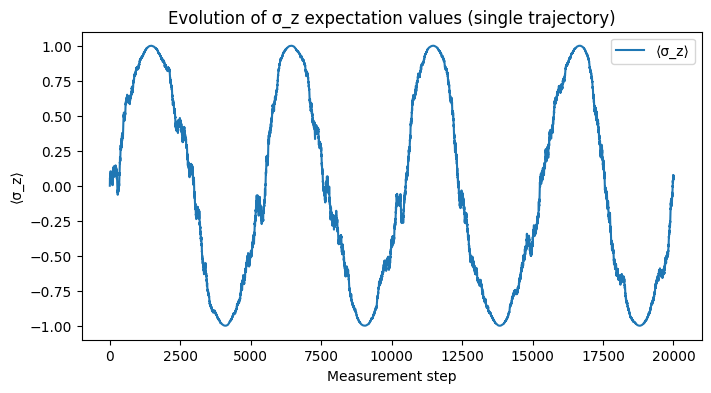

theta = 2.0


In [22]:
# Parameters for a single trajectory
N = 20000  # Number of measurements
epsilon = 0.01
theta = N*epsilon**2
omega_dt = 4*np.pi*epsilon**2
print(theta)
# Run the trajectory
result = kos.run_trajectory(N, epsilon, omega_dt)

# Plot expectation values before and after each measurement
steps = np.arange(N)
plt.figure(figsize=(8, 4))
plt.plot(steps, result.zs_before, label="⟨σ_z⟩")
# plt.plot(steps, result.zs_after, label="⟨σ_z⟩", linestyle="--")
plt.xlabel("Measurement step")
plt.ylabel("⟨σ_z⟩")
plt.title(f"Evolution of σ_z expectation values (single trajectory)")
plt.legend()
plt.show()

# Display entropy production
print(f'theta = {theta}')

entropy histogram:

100%|██████████| 1000/1000 [01:42<00:00,  9.79it/s]

derived theta = 2.0
derived omega * dt= 0.0012566370614359172


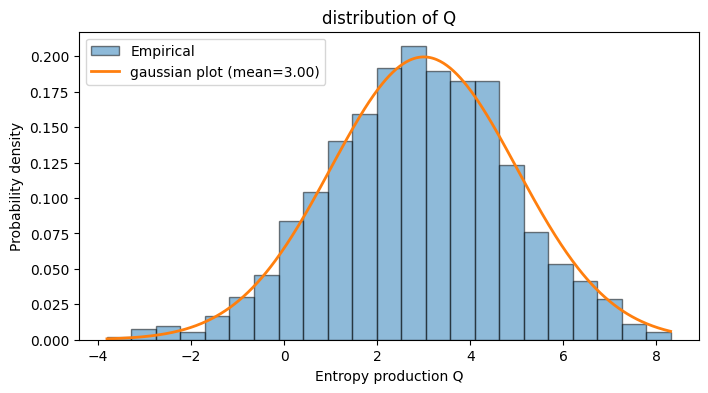

In [ ]:
# Parameters for long-time simulation
N_trajectories = 20000  # Number of trajectories
num_measurements = 20000  # Number of measurements per trajectory
epsilon = 0.01
theta = num_measurements*epsilon**2
omega_dt = 4*np.pi*epsilon**2 

Q_long = kos.simulate_Q_distribution(N_trajectories, num_measurements, epsilon, omega_dt)

print(f'derived theta = {theta}')
print(f'derived omega * dt= {omega_dt}')

gaussian_mean = 3*theta/2
gaussian_std = np.sqrt(2*theta)
# Plot histogram and graph
plt.figure(figsize=(8, 4))
plt.hist(Q_long, bins='auto', density=True, alpha=0.5, edgecolor="black", label="Empirical")

x = np.linspace(min(Q_long), max(Q_long), 500)
plt.plot(x, kos.gaussian_pdf(x, gaussian_mean, gaussian_std), label=f"gaussian plot (mean={gaussian_mean:.2f})", linewidth=2)
plt.xlabel("Entropy production Q")
plt.ylabel("Probability density")
plt.title(f"distribution of Q")
plt.legend()
plt.show()



Testing diffrent initial states

2.0


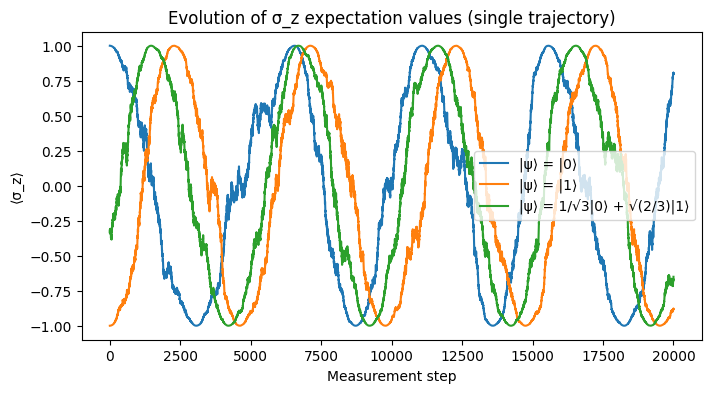

theta = 2.0


In [21]:
from datatypes import InitialState
initial_state_0 = InitialState(1.0, 0.0)
initial_state_1 = InitialState(0.0, 1.0)
initial_state_not_equal = InitialState(1/np.sqrt(3), np.sqrt(2/3))
# Parameters for a single trajectory
N = 20000  # Number of measurements
epsilon = 0.01
theta = N*epsilon**2
omega_dt = 4*np.pi*epsilon**2
print(theta)
# Run the trajectory
result_0 = kos.run_trajectory(N, epsilon, omega_dt, initial_state=initial_state_0)
result_1 = kos.run_trajectory(N, epsilon, omega_dt, initial_state=initial_state_1)
result_not_equal = kos.run_trajectory(N, epsilon, omega_dt, initial_state=initial_state_not_equal)

# Plot expectation values before and after each measurement
steps = np.arange(N)
plt.figure(figsize=(8, 4))
plt.plot(steps, result_0.zs_before, label="|ψ⟩ = |0⟩")
plt.plot(steps, result_1.zs_before, label="|ψ⟩ = |1⟩")
plt.plot(steps, result_not_equal.zs_before, label="|ψ⟩ = 1/√3|0⟩ + √(2/3)|1⟩")
plt.xlabel("Measurement step")
plt.ylabel("⟨σ_z⟩")
plt.title(f"Evolution of σ_z expectation values (single trajectory)")
plt.legend()
plt.show()

# Display entropy production
print(f'theta = {theta}')